In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
series = pd.read_csv("shampoo_sales.csv")

In [3]:
series.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
series

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [6]:
series = pd.read_csv('shampoo_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

C:\Users\VIPIND~1\AppData\Local\Temp/ipykernel_12216/4175343489.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime('190'+x, '%Y-%m')


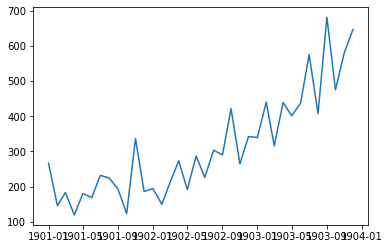

In [7]:
plt.plot(series)

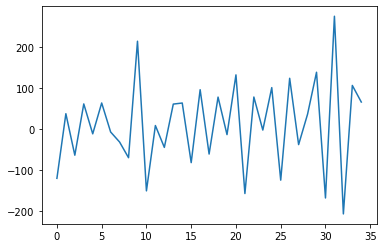

In [8]:
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i]-X[i-1]
    diff.append(value)
plt.plot(diff)
plt.show()

In [9]:
X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
# calculate trend
trend = model.predict(X)

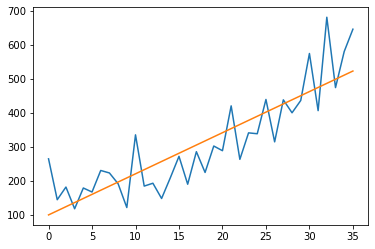

In [13]:
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()

In [14]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]

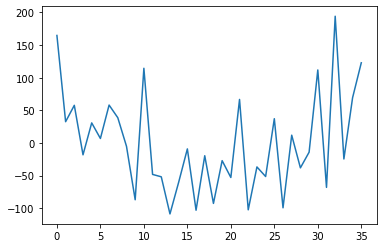

In [15]:
# plot detrended
plt.plot(detrended)
plt.show()

In [16]:
series = pd.read_csv('daily_minimum_temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [17]:
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Daily minimum temperatures, Length: 3650, dtype: float64

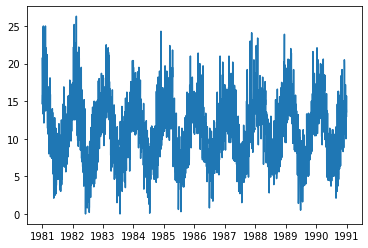

In [18]:
plt.plot(series)

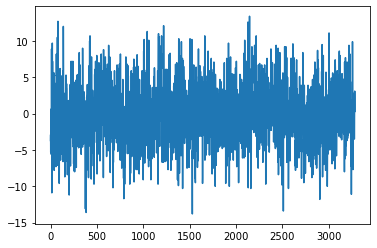

In [19]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = float(X[i]) - float(X[i - days_in_year])
    diff.append(value)
plt.plot(diff)
plt.show()

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Daily minimum temperatures, dtype: float64


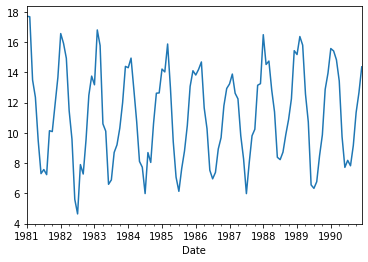

In [20]:
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
plt.show()

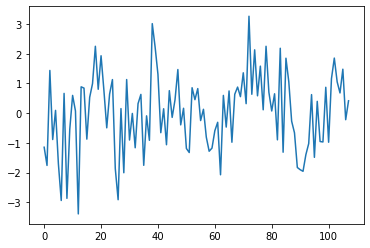

In [21]:
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

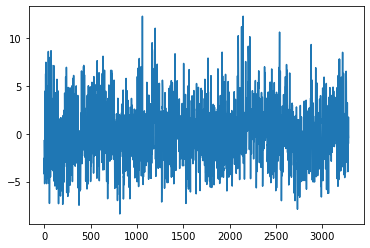

In [22]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
    month_mean_last_year = series[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)
plt.plot(diff)
plt.show()

In [23]:
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = np.polyfit(X, y, degree)
print('Coefficients: %s' % coef)

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


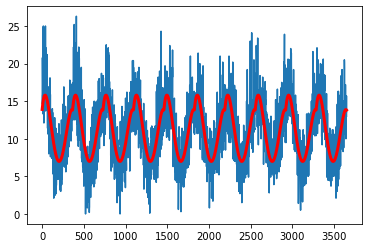

In [24]:
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series.values)
plt.plot(curve, color='red', linewidth=3)
plt.show()

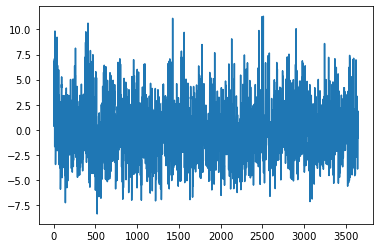

In [25]:
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)
plt.plot(diff)
plt.show()